In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:Desktop/data.csv',encoding='GBK')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#y_train=data.status
#data.drop(['status'],axis=1,inplace=True)

In [4]:
#去掉重复的
data_cols=data.columns.values.tolist()
for col in data_cols:
    if data[col].value_counts().count()==1 :
        data.drop(col,axis=1,inplace=True)
data.drop(['id_name','trade_no','custid'],axis=1,inplace=True)
     
reg_preference_for_trad_mapping={
    '一线城市':1,
    '二线城市':2,
    '三线城市':3,
    '境外':4,
    '其他城市':5
}
data.reg_preference_for_trad=data.reg_preference_for_trad.map(reg_preference_for_trad_mapping)
data.reg_preference_for_trad.fillna(stats.mode(data.reg_preference_for_trad)[0][0],inplace=True)

data.latest_query_time=pd.to_datetime(data.latest_query_time)
data['latest_query_time_year']=data.latest_query_time.dt.year
data['latest_query_time_month']=data.latest_query_time.dt.month
data['latest_query_time_day']=data.latest_query_time.dt.day
data.loans_latest_time=pd.to_datetime(data.loans_latest_time)
data['loans_latest_time_year']=data.loans_latest_time.dt.year
data['loans_latest_time_month']=data.loans_latest_time.dt.month
data['loans_latest_time_day']=data.loans_latest_time.dt.day
data.drop(['latest_query_time','loans_latest_time'],axis=1,inplace=True)

In [5]:
#ata.student_feature.fillna('0',inplace=True)
data.dropna(thresh=80,inplace=True)
data.fillna(data.median(),inplace=True)

In [6]:
#data.student_feature=data.student_feature.astype('int64')

In [7]:
y_data=data.status
data.drop('status',axis=1,inplace=True)
x_train,x_test,y_train,y_test=train_test_split(data,y_data,test_size=0.3,random_state=2018)
x_test.head()

,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,latest_query_time_year,latest_query_time_month,latest_query_time_day,loans_latest_time_year,loans_latest_time_month,loans_latest_time_day
1131,2944,0.02,0.88,8500,1.76,1.00,0.741,28.0,9.0,8.0,3.0,1.0,31870,0,31.0,20150814.0,717700,486.0,0.25,60730,6.0,36950,0.05,1040,0.55,3.0,8.0,8.0,8.0,8.0,1.0,0.0,3.0,3.0,27.0,2000,18.0,0.0,280,27950,0.0,1011.0,82.0,638.0,79.0,8.0,5.0,3.0,10.0,2.0,5.0,5.0,603.0,76.0,71.0,71.0,0.0,20.0,5.0,15.0,0.0,1.0,26.0,101.0,2.0,0.0,0.0,338.0,2200.0,76.0,15.0,15.0,5000.0,1966.0,21700.0,79.0,5.0,5.0,49200.0,24000.0,17.0,68.0,2018.0,4.0,20.0,2018.0,2.0,28.0
3410,8586,0.09,0.91,400,1.14,0.52,0.242,16.0,85.0,69.0,4.0,1.0,5650,0,32.0,20130101.0,59450,126.0,0.70,690,6.0,4660,1.00,490,0.70,1.0,0.0,85.0,0.0,90.0,0.0,1.0,1.0,2.0,0.0,650,1.0,0.0,0,0,0.0,1966.0,83.0,531.0,75.0,4.0,3.0,1.0,6.0,2.0,4.0,6.0,486.0,77.0,8.0,6.0,1.0,5.0,2.0,3.0,0.0,1.0,4.0,6.0,3.0,0.0,0.0,298.0,700.0,78.0,3.0,3.0,1000.0,666.0,4400.0,77.0,2.0,3.0,5400.0,3600.0,12.0,71.0,2018.0,4.0,22.0,2018.0,2.0,22.0
366,898,0.00,0.54,0,1.03,0.86,0.297,14.0,23.0,27.0,3.0,1.0,31060,0,25.0,20151031.0,173520,145.0,0.55,25250,6.0,36870,0.65,2950,0.30,3.0,5.0,23.0,5.0,23.0,0.0,0.0,1.0,2.0,0.0,1050,2.0,0.0,1050,58780,0.0,933.0,95.0,531.0,83.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,495.0,75.0,13.0,13.0,1.0,4.0,0.0,4.0,0.0,0.0,3.0,14.0,0.0,0.0,0.0,353.0,3200.0,75.0,4.0,4.0,5400.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,124.0,2018.0,4.0,10.0,2018.0,1.0,3.0
4084,10317,0.04,0.96,500,0.62,0.68,0.233,19.0,23.0,17.0,4.0,1.0,5310,0,39.0,20130602.0,58330,146.0,0.65,5850,7.0,1210,0.40,770,0.60,3.0,10.0,18.0,10.0,18.0,0.0,1.0,4.0,4.0,0.0,500,2.0,1.0,0,80,0.0,1814.0,82.0,609.0,74.0,4.0,2.0,1.0,5.0,0.0,0.0,1.0,584.0,83.0,8.0,7.0,0.0,4.0,0.0,4.0,0.0,0.0,1.0,8.0,1.0,0.0,0.0,334.0,1300.0,83.0,4.0,5.0,2000.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,177.0,2017.0,12.0,23.0,2017.0,11.0,11.0
440,1077,0.02,0.86,20000,1.58,0.92,0.569,29.0,12.0,12.0,2.0,1.0,9790,0,33.0,20150328.0,375420,399.0,0.20,56240,7.0,19140,0.05,1330,0.50,1.0,6.0,10.0,6.0,10.0,3.0,1.0,5.0,5.0,35.0,4120,6.0,0.0,440,30890,0.0,1150.0,82.0,545.0,75.0,10.0,4.0,3.0,

In [8]:
#scaler=StandardScaler()
#x_train_scaled=scaler.fit_transform(x_train)
#x_test_scaled=scaler.transform(x_test)

In [9]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression 
#parameters={'max_depth':range(1,10,3),'n_estimators':[100,200,300]}
#forest = RandomForestClassifier(mini_samples_leaf=3,random_state=1,n_jobs=1)
#reserchCV=GridSearchCV(forest,parameters,cv=3)
#forest.fit(x_train,y_train)
#

In [10]:
RF = RandomForestClassifier(max_depth=7,n_estimators=300,min_samples_leaf=3,random_state=1,n_jobs=1)
lgb=LGBMClassifier(boosting_type='gbdt', max_depth=-1, learning_rate=0.01,
                            subsample_for_bin=50000, objective='binary', min_split_gain=0,
                           min_child_weight=5, min_child_samples=10, subsample=0.8, subsample_freq=1,
                           colsample_bytree=1, seed=1000, n_jobs=10, silent=True,eval_matric='binary_error',num_leaves=35,
                      n_estimators=1000,reg_alpha=5,reg_lambda=8)
xgb=XGBClassifier(booster='gbtree', max_depth=7, learning_rate=0.01,
                             objective='binary:logistic', gamma=0,
                           min_child_weight=5, subsample=0.8, subsample_freq=1,
                           colsample_bytree=1, random_state=2019, n_jobs=10, silent=True,eval_matric='binary_error',n_estimators=1000,
                     num_leaves=25,reg_alpha=5,reg_lambda=8)
LR=LogisticRegression(C=0.1,penalty='l1')

In [11]:
from mlxtend.classifier import StackingCVClassifier 

In [12]:
scf=StackingCVClassifier([RF,lgb,xgb],cv=3,meta_classifier=LR)
scf.fit(x_train,y_train)

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=300,
                                                         n_jobs=1,


In [20]:
scf.predict(x_train.values)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
train_pre=scf.predict(x_train.values)
test_pre=scf.predict(x_test.values)
print('train_accuracy:',accuracy_score(y_train,train_pre))
print('train_precision:',precision_score(y_train,train_pre))
print('train_recall:',recall_score(y_train,train_pre))
print('train_f1_score:',f1_score(y_train,train_pre))
print('-----------------------------------')
print('test_accuracy:',accuracy_score(y_test,test_pre))
print('test_precision:',precision_score(y_test,test_pre))
print('test_recall',recall_score(y_test,test_pre))
print('train_f1_score:',f1_score(y_test,test_pre))


train_accuracy: 0.9131136950904393
train_precision: 0.9558011049723757
train_recall: 0.6793193717277487
train_f1_score: 0.7941851568477429
-----------------------------------
test_accuracy: 0.7882441597588545
test_precision: 0.6976744186046512
test_recall 0.3438395415472779
train_f1_score: 0.4606525911708253


0.8583665235781704
0.6589159210364406


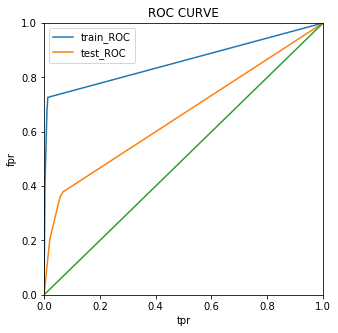

In [24]:
x_train_proba=scf.predict_proba(x_train.values)[:,1]
x_test_proba=scf.predict_proba(x_test.values)[:,1]
print(roc_auc_score(y_train,x_train_proba))
print(roc_auc_score(y_test,x_test_proba))
x_train_fpr,x_train_tpr,x_train_threshold=roc_curve(y_train,x_train_proba)
x_test_fpr,x_test_tpr,x_test_threshold=roc_curve(y_test,x_test_proba)
plt.figure(figsize=(5,5))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.title('ROC CURVE')
plt.plot(x_train_fpr,x_train_tpr,label='train_ROC')
plt.plot(x_test_fpr,x_test_tpr,label='test_ROC')
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,1)
plt.legend()
plt.plot([0,1],[0,1])
plt.show()

In [ ]:
from xgboost import XGBClassifier 
